In [1]:
import seaborn as sns

print("Seaborn version:", sns.__version__)

Seaborn version: 0.13.2


In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [5]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [6]:

pd.options.mode.chained_assignment = None


In [7]:
df = pd.read_csv(r'C:\Users\me\Desktop\movies.csv')


In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [8]:
df['budget'].unique()

array([1.9000000e+07, 4.5000000e+06, 1.8000000e+07, 3.5000000e+06,
       6.0000000e+06, 5.5000000e+05, 2.7000000e+07, 5.4000000e+07,
       1.0000000e+07, 1.5000000e+07, 5.0000000e+06, 2.0000000e+07,
       6.5000000e+06, 5.1000000e+06,           nan, 1.0000000e+06,
       1.1000000e+07, 4.4000000e+07, 1.2000000e+07, 3.6000000e+07,
       9.0000000e+06, 4.8000000e+06, 4.0000000e+06, 3.0000000e+06,
       2.2000000e+07, 3.0000000e+05, 3.5000000e+07, 7.0000000e+06,
       9.0000000e+05, 5.5000000e+06, 3.5000000e+05, 2.5000000e+06,
       1.2500000e+06, 2.8000000e+07, 1.4000000e+07, 3.2000000e+07,
       1.2500000e+07, 2.8000000e+06, 8.5000000e+06, 1.6000000e+07,
       4.0000000e+05, 2.6000000e+07, 8.0000000e+06, 1.7000000e+07,
       8.6000000e+06, 8.0000000e+05, 2.5000000e+05, 1.5000000e+06,
       3.8000000e+06, 2.7000000e+06, 1.3000000e+07, 4.6000000e+07,
       2.4000000e+07, 2.0000000e+06, 1.0500000e+07, 7.5000000e+06,
       1.3200000e+07, 5.0000000e+07, 1.0700000e+07, 1.1200000e

In [9]:
df['gross'] = df['gross'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [10]:
mean_gross = df['gross'].mean()

df['gross'].fillna(mean_gross,inplace = True)

df['gross'] = df['gross'].astype('int64')

In [11]:
df['budget'].fillna(0,inplace = True)

df['budget'] = df['budget'].astype('int64')

In [12]:
df.sort_values(by= ['gross'],inplace = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,0,682,Roxwell Films,93.0
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,0,790,Visual Arts Entertainment,104.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,0,1400,British Broadcasting Corporation (BBC),103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0


In [13]:
df = df.sort_values(by = 'gross',inplace = False,ascending = False)

In [14]:
pd.set_option('display.max_rows',None)

In [8]:
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

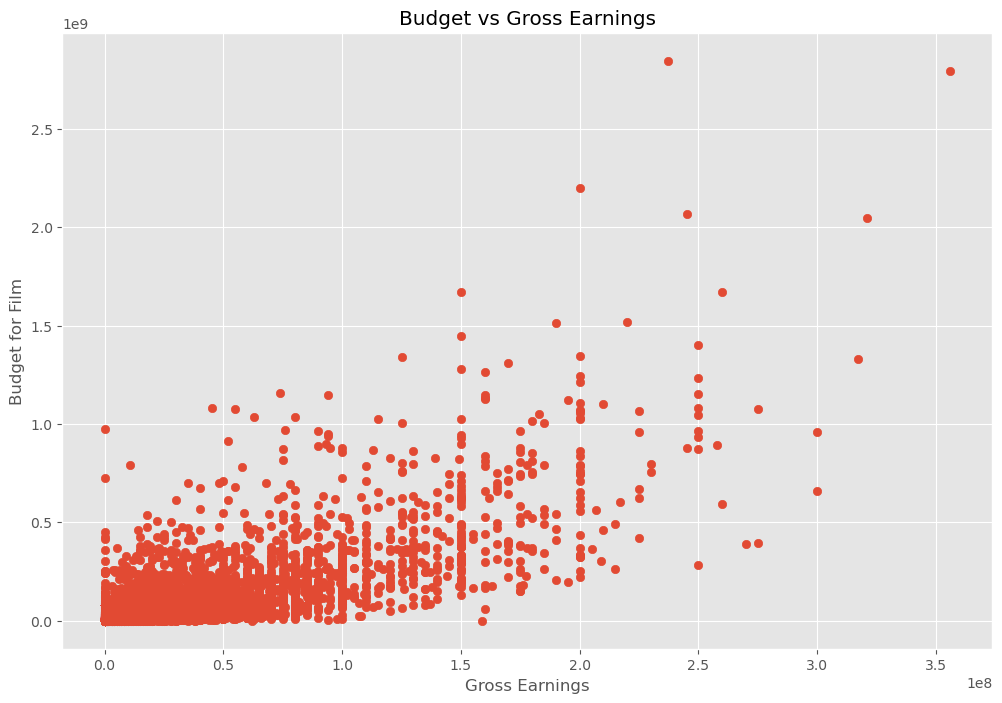

In [16]:
plt.scatter(x= df['budget'] , y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show() 

<Axes: xlabel='budget', ylabel='gross'>

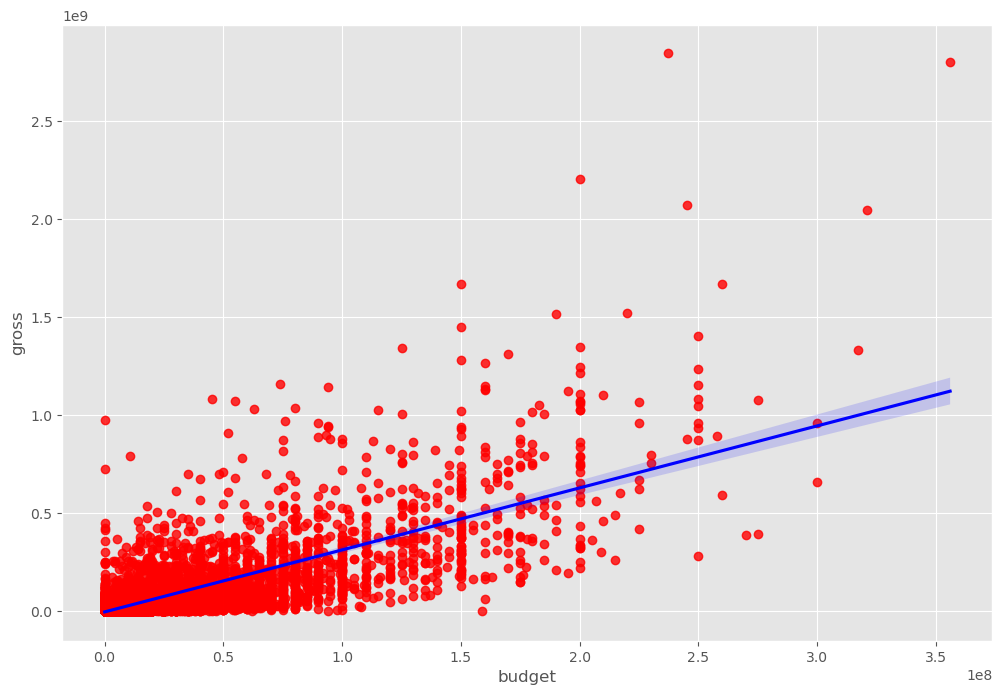

In [17]:
sns.regplot(x = 'budget' , y = 'gross', data = df, scatter_kws = {"color":"red"},line_kws = {"color":"blue"})

In [18]:
non_numeric_to_keep = ['name', 'rating','genre','released','director','writer','star','company','country'] 
df_numeric = df.drop(columns=non_numeric_to_keep)


In [19]:
df_numeric.corr(method = 'pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.628713,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.744858,0.269510
gross,0.252042,0.182868,0.628713,0.744858,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.269510,0.241336,1.000000


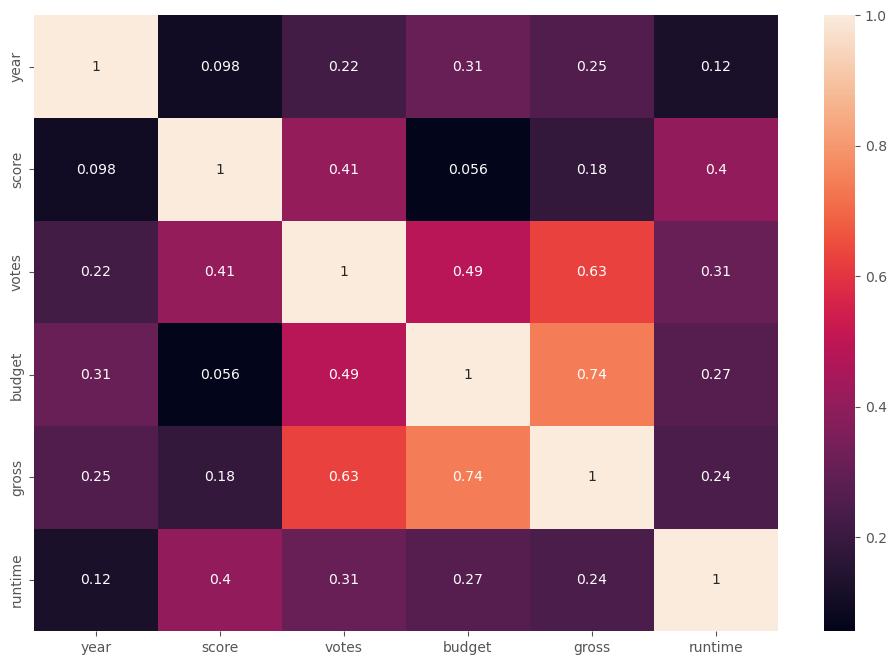

In [20]:
correlation_matrix = df_numeric.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [21]:
import matplotlib

print("Matplotlib version:", matplotlib.__version__)


Matplotlib version: 3.8.0


In [22]:
import seaborn as sns

print("Seaborn version:", sns.__version__)

Seaborn version: 0.13.2


In [12]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
         df_numerized[col_name] = df_numerized[col_name].astype('category')
         df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [40]:
a = df_numerized['name'].dtype
print(a)

category


In [37]:
df_numerized.dtypes

name        category
rating      category
genre           int8
year           int64
released       int16
score        float64
votes        float64
director       int16
writer         int16
star           int16
country         int8
budget         int64
gross          int64
company        int16
runtime      float64
dtype: object

In [15]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0


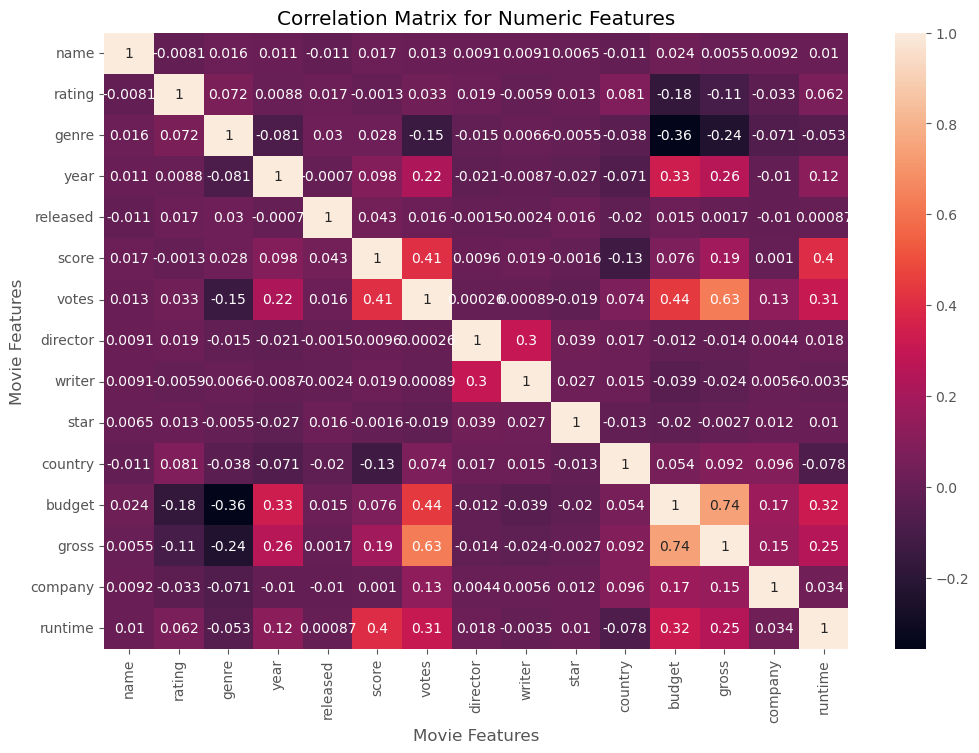

In [14]:
correlation_matrix = df_numerized.corr('pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [46]:
df_numerized.drop(columns=['name'],inplace = True)
df_numerized.drop(columns=['rating'],inplace = True)


df_numerized.head()


,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0
7445,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0
3045,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0
6663,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0


In [56]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

genre     genre       1.000000
          year       -0.081261
          released    0.029822
          score       0.027965
          votes      -0.145307
          director   -0.015258
          writer      0.006567
          star       -0.005477
          country    -0.037615
          budget     -0.334021
          gross      -0.230267
          company    -0.071067
          runtime    -0.052711
year      genre      -0.081261
          year        1.000000
          released   -0.000695
          score       0.097995
          votes       0.222945
          director   -0.020795
          writer     -0.008656
          star       -0.027242
          country    -0.070938
          budget      0.309212
          gross       0.252042
          company    -0.010431
          runtime     0.120811
released  genre       0.029822
          year       -0.000695
          released    1.000000
          score       0.042788
          votes       0.016097
          director   -0.001478
        

In [57]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.334021
genre     budget     -0.334021
gross     genre      -0.230267
genre     gross      -0.230267
          votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
genre     runtime    -0.052711
runtime   genre      -0.052711
genre     country    -0.037615
country   genre      -0.037615
year      star       -0.027242
star      year       -0.027242
budget    writer     -0.025911
writer    budget     -0.025911
          gross      -0.023210
gross     writer     -0.023210
director  year       -0.020795
year      director   -0.020795
released  country    -0.020427
country   released   -0.020427
budget    star       -0.019952
star      budget     -0.019952
        

In [58]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr


gross     votes       0.628713
votes     gross       0.628713
gross     budget      0.744858
budget    gross       0.744858
genre     genre       1.000000
writer    writer      1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64